## Assessing the Implications of Using FUMA instead of just MAGMA on scDRS results

In [3]:
library(data.table)
library(ggplot2)
library(cowplot)
library(tidyverse)

In [31]:
meta_colors_mac <- c("M-0: MERTK+ SELENOP+ LYVE1+"="#d0b4dc",
                 "M-1: MERTK+ SELENOP+ LYVE1-"="#FCCDE5", 
                 "M-2: MERTK+ S100A8+"="#945cb4", 
                 "M-3: MERTK+ HBEGF+"="#842bd7", 
                 "M-4: SPP1+"="yellow4", 
                 "M-5: C1QA+"="#B38072",
                 "M-6: STAT1+ CXCL10+"="#d11141", 
                 "M-7: IL1B+ FCN1+ HBEGF+"="#FDB462", 
                 "M-8: PLCG2+"="grey", 
                 "M-9: DC3"="#1F78B4", 
                 "M-10: DC2"="#A6CEE3", 
                 "M-11: CD16+/DC4"="#66C2A4", 
                 "M-12: DC1"="#CCECE6",
                 "M-13: pDC"="#238B45", 
                 "M-14: LAMP3+"="#A1D99B")
meta_colors_mac <- c("M-0: MERTK+ SELENOP+ LYVE1+"="#d0b4dc",
                 "M-1: MERTK+ SELENOP+ LYVE1-"="#FCCDE5", 
                 "M-2: MERTK+ S100A8+"="#945cb4", 
                 "M-3: MERTK+ HBEGF+"="#842bd7", 
                 "M-4: SPP1+"="yellow4", 
                 "M-5: C1QA+"="#B38072",
                 "M-6: STAT1+ CXCL10+"="#d11141", 
                 "M-7: IL1B+ FCN1+ HBEGF+"="#FDB462", 
                 "M-8: PLCG2+"="grey", 
                 "M-9: DC3"="#1F78B4", 
                 "M-10: DC2"="#A6CEE3", 
                 "M-11: CD16+/DC4"="#66C2A4", 
                 "M-12: DC1"="#CCECE6",
                 "M-13: pDC"="#238B45", 
                 "M-14: LAMP3+"="#A1D99B")
meta_colors_fib <- c('F-0: PRG4+ CLIC5+ lining'='#A6CEE3',
                   'F-1: PRG4+ lining'='#1F78B4', 
                   'F-2: CD34+ sublining'='#B2DF8A', 
                   'F-3: POSTN+ sublining'='#33A02C', 
                   'F-4: DKK3+ sublining'='#E31A1C', 
                   'F-5: CD74-hi sublining'='#FB9A99', 
                   'F-6: CXCL12+ SFRP1+ sublining'='#FDBF6F', 
                   'F-7: NOTCH3+ sublining'='#FF7F00', 
                   'F-8: RSPO3+ intermediate'='#6495ED', 
                   'Mu-0: Mural'='#9932CC')
# meta_colors_b <- c("B-0: CD24+CD27+CD11b+\n switched memory" = "#A6CEE3", 
#                    "B-1: CD24++CD27+IgM+\n unswitched memory" = "#B2DF8A",
#                    "B-2: IgM+IgD+TCL1A+ naive" = "#FF7F00", 
#                    "B-3: IgM+IgD+CD1c+ MZ-like" = "#1F78B4",
#                    "B-4: AICDA+BCL6+ GC-like" = "#33A02C",
#                    "B-5: CD11c+LAMP1+ ABC" = "#CAB2D6",
#                    "B-6: IgM+ plasma" = "#FDBF6F", 
#                    "B-7: HLA-DR+IgG+ plasmablast" = "brown",
#                    "B-8: IgG1+IgG3+ plasma" = "#6A3D9A"
#                    )
meta_colors_b <- c("B-0: CD24+CD27+CD11b+ switched memory" = "#A6CEE3", 
                   "B-1: CD24++CD27+IgM+ unswitched memory" = "#B2DF8A", 
                   "B-2: IgM+IgD+TCL1A+ naive" = "#FF7F00", 
                   "B-3: IgM+IgD+CD1c+ MZ-like" = "#1F78B4",
                   "B-4: AICDA+BCL6+ GC-like" = "#33A02C",
                   "B-5: CD11c+LAMP1+ ABC" = "#CAB2D6",
                   "B-6: IgM+ plasma" = "#FDBF6F", 
                   "B-7: HLA-DR+IgG+ plasmablast" = "brown",
                   "B-8: IgG1+IgG3+ plasma" = "#6A3D9A"
                   )

meta_colors_t <- c("T-0: CD4+ IL7R+ memory" = "#A6CEE3", "T-1: CD4+ CD161+ memory" = "#1F78B4", 
                 "T-2: CD4+ IL7R+CCR5+ memory" = "#B2DF8A", "T-3: CD4+ Tfh/Tph" = "#33A02C", 
                 "T-4: CD4+ naive" = "#FB9A99", "T-5: CD4+ GZMK+ memory" = "#E31A1C", 
                 "T-6: CD4+ memory" = "#FDBF6F", "T-7: CD4+ Tph" = "#FF7F00", 
                 "T-8: CD4+ CD25-high Treg" = "#CAB2D6", "T-9: CD4+ CD25-low Treg" = "#6A3D9A", 
                 "T-10: CD4+ OX40+NR3C1+" = "#FFFF99", "T-11: CD4+ CD146+ memory" = "#B15928", 
                 "T-12: CD4+ GNLY+" = "#B3E2CD", "T-13: CD8+ GZMK/B+ memory" = "#FDCDAC", 
                 "T-14: CD8+ GZMK+ memory" = "#CBD5E8", "T-15: CD8+ GZMB+/TEMRA" = "#F4CAE4",
                 "T-16: CD8+ CD45ROlow/naive" = "#1B9E77", "T-17: CD8+ activated/NK-like" = "#D95F02",
                 "T-18: Proliferating" = "#7570B3", "T-19: MT-high (low quality)" = "#E7298A", 
                 "T-20: CD38+" = "#66A61E", "T-21: Innate-like" = "#E6AB02", 
                 "T-22: Vdelta1" = "#A6761D", "T-23: Vdelta2" = "#666666")

meta_colors_nk <- c("NK-0: CD56dim CD16+ IFNG-" = "#9E0142", 
                    "NK-1: CD56dim CD16+ IFNG+CD160+" = "#D53E4F", 
                    "NK-2: CD56dim CD16+ IFNG+CD160-" = "#F46D43",
                    "NK-3: CD56dim CD16+ GZMB-" = "#FDAE61", 
                    "NK-4: CD56bright CD16- GZMA+CD160+" = "#FEE08B", 
                    "NK-5: CD56bright CD16- GZMA+CD69+" = "#FFFFBF", 
                    "NK-6: CD56bright CD16- GNLY+" = "#E6F598", 
                    "NK-7: CD56bright CD16- GNLY+CD69+" = "#ABDDA4", 
                    "NK-8: CD56bright CD16- IFN response" = "#66C2A5",
                    "NK-9: MT-high" = "#3288BD", 
                    "NK-10: PCNA+ Proliferating" = "grey",
                    "NK-11: MKI67+ Proliferating" = "dimgrey", 
                    "NK-12: IL7R+ ILC" = "#BEAED4", 
                    "NK-13: IL7R+CD161+ ILC" = "#5E4FA2")

meta_colors_end <- c("E-0: SPARC+ capillary" = "#8DD3C7", 
                     "E-1: LIFR+ venular" = "#BEBADA",
                     "E-2: ICAM1+ venular" = "#FB8072", 
                     "E-3: NOTCH4+ arteriolar" = "#80B1D3", 
                     "E-4: Lymphatic" = "#FDB462")
meta_colors <- c(meta_colors_b, meta_colors_end, meta_colors_fib, meta_colors_mac, meta_colors_t, meta_colors_nk)

meta_colors <- c(meta_colors_t, meta_colors_nk, 
                 meta_colors_mac, meta_colors_b,
                meta_colors_fib, meta_colors_end)
meta_colors1 <- list(meta_colors_end, meta_colors_fib, 
                     meta_colors_b, meta_colors_mac,
                     meta_colors_nk, meta_colors_t)

## 1. Cell Cluster scores

In [98]:
# read in the macro & micro 10kb
## New 10 & 5035
output_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/SCDRS/RA_53/"
micro_5035 <- fread(paste0(output_dir, "RA.scdrs_group.cell_type_micro"))
micro_10 <- fread("~/Desktop/SCRNA-GWAS-Benchmarking/output/scDRS_Win/RA_10kb.scdrs_group.cell_type")
micro_100 <- fread("~/Desktop/SCRNA-GWAS-Benchmarking/output/scDRS_Win/RA_100kb.scdrs_group.cell_type")
# Fuma
clusters_fuma <- fread(paste0(down_dir, "RA.scdrs_group.cell_type_micro_fuma_onlyinexp_051223"))
clusters_fuma_mag <- fread(paste0(down_dir, "RA.scdrs_group.cell_type_micro_fumagma_onlyinexp_051223"))



In [42]:
# get ranked cell clusters according to 5035
ranked_cell_clusters <- c()
for (cell_type in meta_colors1) {
    # get the ranked cells in that group
    data <- micro_5035[micro_5035$group %in% names(cell_type),]
    data <- data[order(abs(assoc_mcz)),]
    # now add the ranked cells to a list
    ranked_cell_clusters <- c(ranked_cell_clusters, data$group)
    } 
ranked_cell_clusters

[1] "E-2: ICAM1+ venular"                   
 [2] "E-0: SPARC+ capillary"                 
 [3] "E-4: Lymphatic"                        
 [4] "E-3: NOTCH4+ arteriolar"               
 [5] "E-1: LIFR+ venular"                    
 [6] "F-0: PRG4+ CLIC5+ lining"              
 [7] "F-1: PRG4+ lining"                     
 [8] "F-4: DKK3+ sublining"                  
 [9] "F-5: CD74-hi sublining"                
[10] "Mu-0: Mural"                           
[11] "F-3: POSTN+ sublining"                 
[12] "F-7: NOTCH3+ sublining"                
[13] "F-2: CD34+ sublining"                  
[14] "F-8: RSPO3+ intermediate"              
[15] "F-6: CXCL12+ SFRP1+ sublining"         
[16] "B-7: HLA-DR+IgG+ plasmablast"          
[17] "B-8: IgG1+IgG3+ plasma"                
[18] "B-6: IgM+ plasma"                      
[19] "B-1: CD24++CD27+IgM+ unswitched memory"
[20] "B-2: IgM+IgD+TCL1A+ naive"             
[21] "B-0: CD24+CD27+CD11b+ switched memory" 
[22] "B-3: IgM+IgD+CD1c+ MZ-like"            
[23] "B-4: AICDA+BCL6+ GC-like"              
[24] "B-5: CD11c+LAMP1+ ABC"                 
[25] "M-5: C1QA+"                            
[26] "M-7: IL1B+ FCN1+ HBEGF+"               
[27] "M-8: PLCG2+"                           
[28] "M-13: pDC"                             
[29] "M-11: CD16+/DC4"                       
[30] "M-6: STAT1+ CXCL10+"                   
[31] "M-9: DC3"                              
[32] "M-10: DC2"                             
[33] "M-4: SPP1+"                            
[34] "M-2: MERTK+ S100A8+"                   
[35] "M-12: DC1"                             
[36] "M-3: MERTK+ HBEGF+"                    
[37] "M-14: LAMP3+"                          
[38] "M-0: MERTK+ SELENOP+ LYVE1+"           
[39] "M-1: MERTK+ SELENOP+ LYVE1-"           
[40] "NK-8: CD56bright CD16- IFN response"   
[41] "NK-4: CD56bright CD16- GZMA+CD160+"    
[42] "NK-6: CD56bright CD16- GNLY+"          
[43] "NK-9: MT-high"                         
[44] "NK-11: MKI67+ Proliferating"           
[45] "NK-3: CD56dim CD16+ GZMB-"             
[46] "NK-12: IL7R+ ILC"                      
[47] "NK-5: CD56bright CD16- GZMA+CD69+"     
[48] "NK-0: CD56dim CD16+ IFNG-"             
[49] "NK-13: IL7R+CD161+ ILC"                
[50] "NK-7: CD56bright CD16- GNLY+CD69+"     
[51] "NK-2: CD56dim CD16+ IFNG+CD160-"       
[52] "NK-1: CD56dim CD16+ IFNG+CD160+"       
[53] "NK-10: PCNA+ Proliferating"            
[54] "T-22: Vdelta1"                         
[55] "T-23: Vdelta2"                         
[56] "T-19: MT-high (low quality)"           
[57] "T-15: CD8+ GZMB+/TEMRA"                
[58] "T-16: CD8+ CD45ROlow/naive"            
[59] "T-12: CD4+ GNLY+"                      
[60] "T-21: Innate-like"                     
[61] "T-14: CD8+ GZMK+ memory"               
[62] "T-17: CD8+ activated/NK-like"          
[63] "T-4: CD4+ naive"                       
[64] "T-5: CD4+ GZMK+ memory"                
[65] "T-13: CD8+ GZMK/B+ memory"             
[66] "T-0: CD4+ IL7R+ memory"                
[67] "T-2: CD4+ IL7R+CCR5+ memory"           
[68] "T-1: CD4+ CD161+ memory"               
[69] "T-9: CD4+ CD25-low Treg"               
[70] "T-6: CD4+ memory"                      
[71] "T-3: CD4+ Tfh/Tph"                     
[72] "T-18: Proliferating"                   
[73] "T-10: CD4+ OX40+NR3C1+"                
[74] "T-7: CD4+ Tph"                         
[75] "T-11: CD4+ CD146+ memory"              
[76] "T-20: CD38+"                           
[77] "T-8: CD4+ CD25-high Treg"

In [34]:
setdiff(micro_10$group, ranked_cell_clusters)
setdiff(ranked_cell_clusters, micro_10$group)

character(0)

character(0)

In [99]:
# Get the ranks of z scores
micro_10 <- micro_10[order(-abs(micro_10$assoc_mcz)),]
micro_10$rank_assoc_mcz <- seq(1, nrow(micro_10))
micro_100 <- micro_100[order(-abs(micro_100$assoc_mcz)),]
micro_100$rank_assoc_mcz <- seq(1, nrow(micro_100))
clusters_fuma <- clusters_fuma[order(-abs(clusters_fuma$assoc_mcz)),]
clusters_fuma$rank_assoc_mcz <- seq(1, nrow(clusters_fuma))
clusters_fuma_mag <- clusters_fuma_mag[order(-abs(clusters_fuma_mag$assoc_mcz)),]
clusters_fuma_mag$rank_assoc_mcz <- seq(1, nrow(clusters_fuma_mag))

### Just FUMA

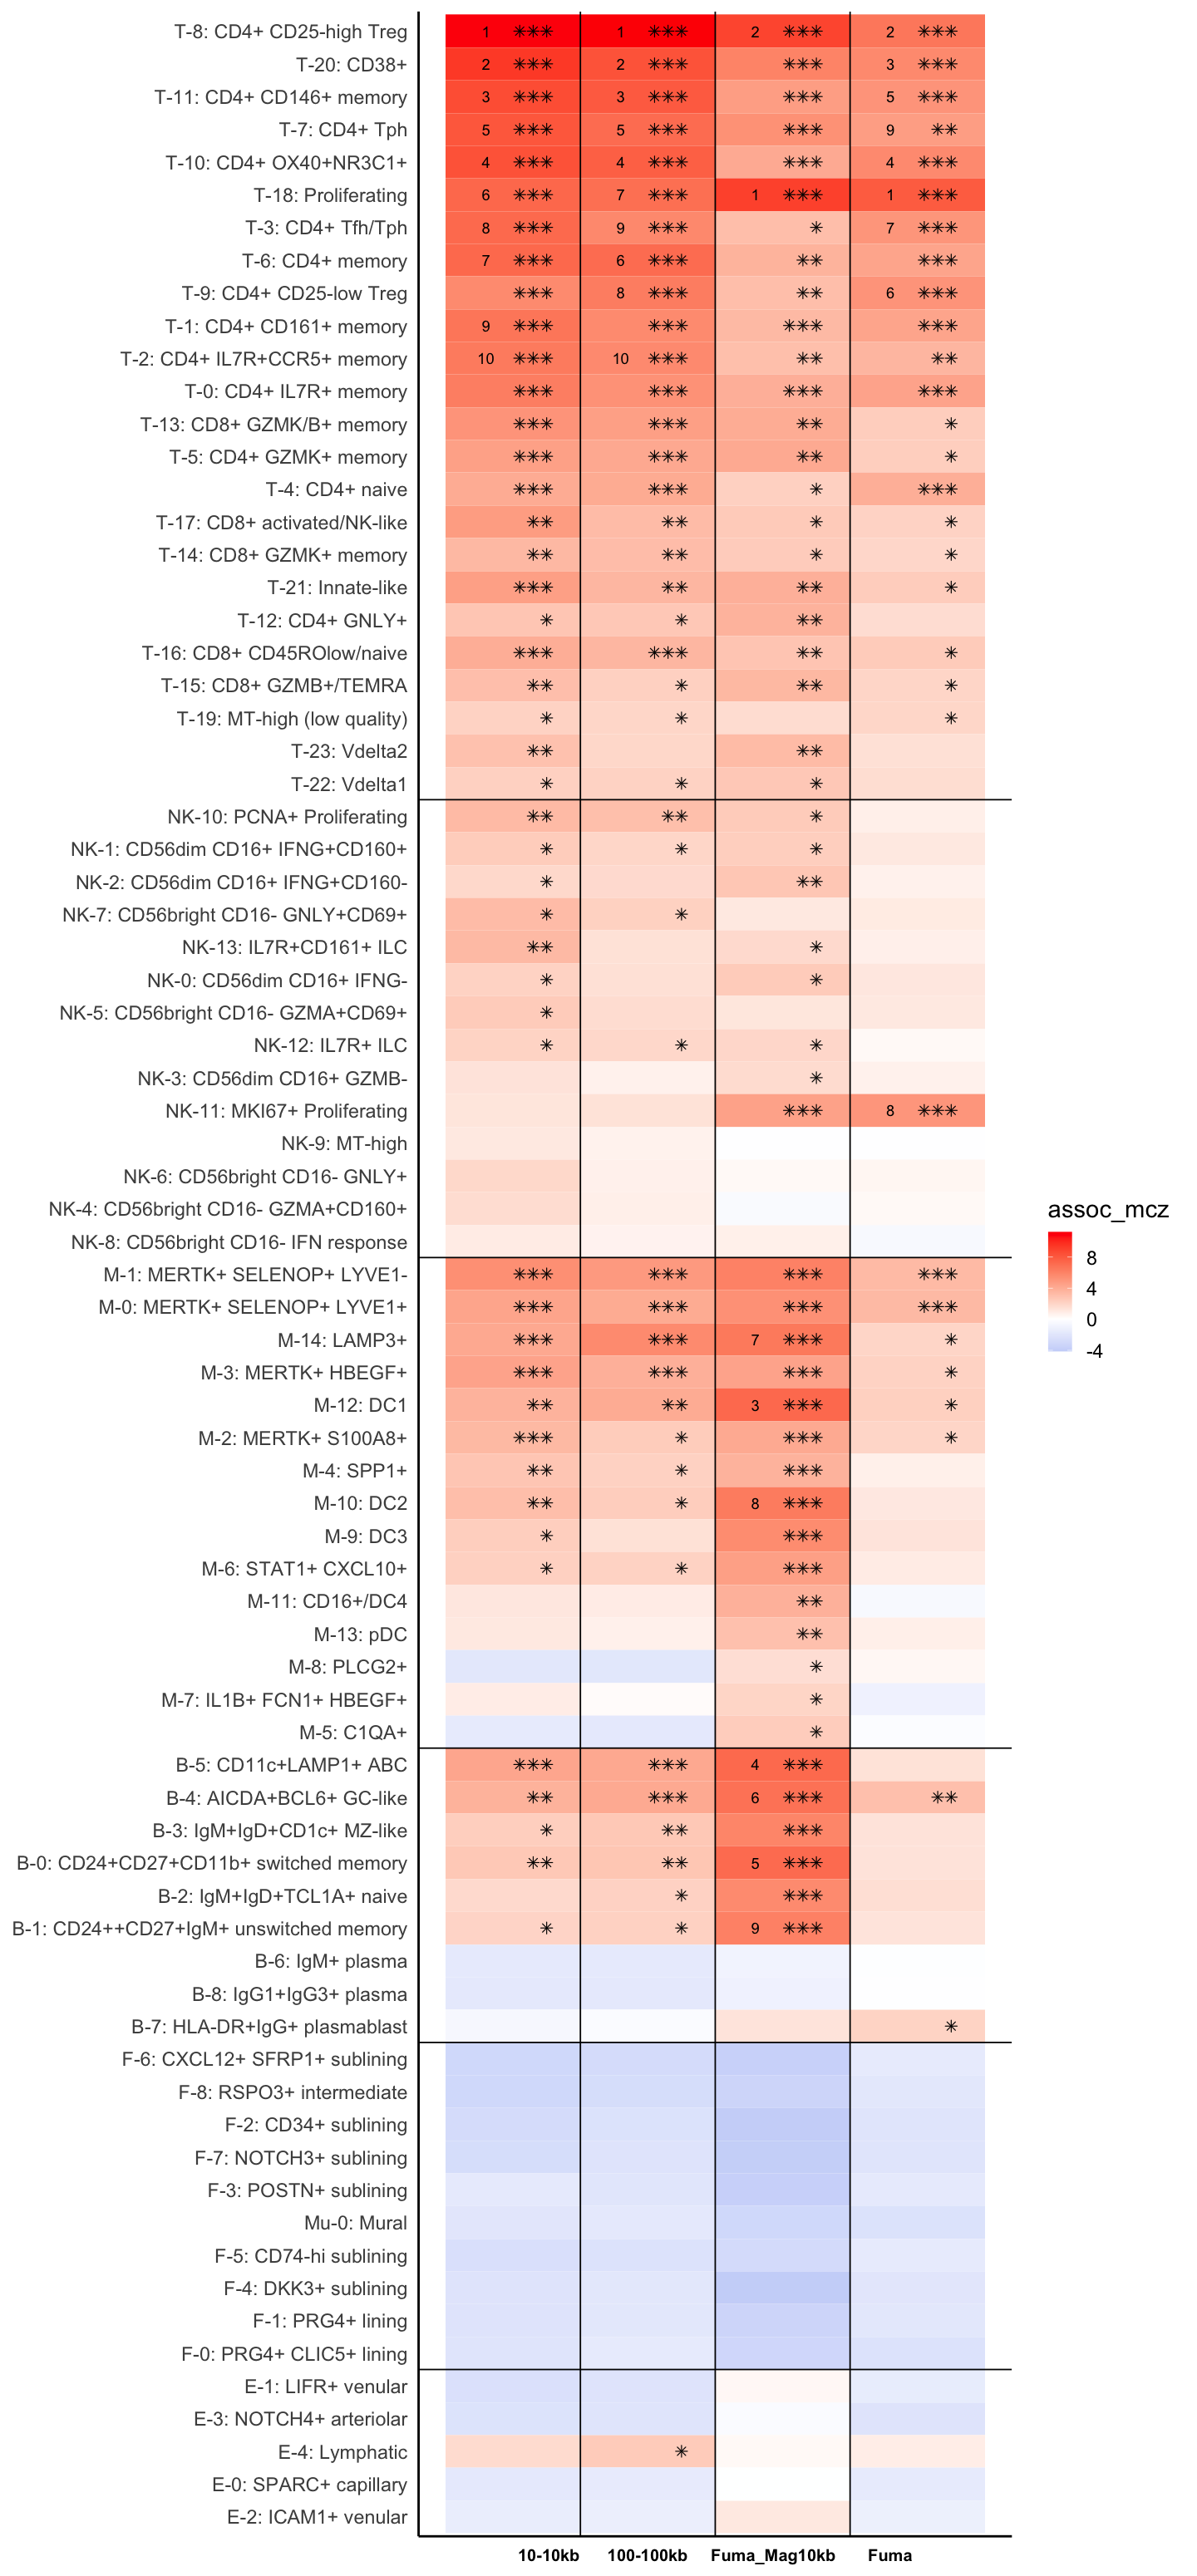

In [106]:
# assoc_mcz, prop_sig

options(repr.plot.height = nrow(clusters_10_our)/2.98, repr.plot.width =12 )

# New 10
p <- ggplot() + 
geom_tile(data=micro_100, aes(x=1.5, y=factor(group, ranked_cell_clusters), fill=assoc_mcz)) + 
scale_fill_gradient2(low="cornflowerblue", mid="white", high="red", midpoint=0) + 
geom_point(data = micro_100[micro_100$assoc_mcp < 0.05,], aes(x=1.75, y=group), size=2.5, color='black', shape=8) + 
geom_point(data = micro_100[micro_100$assoc_mcp < 0.01,], aes(x=1.65, y=group), size=2.5, color='black', shape=8) + 
geom_point(data = micro_100[micro_100$assoc_mcp < 0.001,], aes(x=1.55, y=group), size=2.5, color='black', shape=8) + 
geom_text(data=micro_100[micro_100$rank_assoc_mcz<11,], aes(x=1.3, y=group, label = rank_assoc_mcz)) +

geom_tile(data=micro_10, aes(x=0.5, y=factor(group, ranked_cell_clusters), fill=assoc_mcz)) +  
geom_point(data = micro_10[micro_10$assoc_mcp < 0.05,], aes(x=0.75, y=group), size=2.5, color='black', shape=8) + 
geom_point(data = micro_10[micro_10$assoc_mcp < 0.01,], aes(x=0.65, y=group), size=2.5, color='black', shape=8) + 
geom_point(data = micro_10[micro_10$assoc_mcp < 0.001,], aes(x=0.55, y=group), size=2.5, color='black', shape=8) + 
geom_text(data=micro_10[micro_10$rank_assoc_mcz<11,], aes(x=0.3, y=group, label = rank_assoc_mcz)) +


geom_tile(data=clusters_fuma_mag, aes(x=2.5, y=group, fill=assoc_mcz)) + 
geom_point(data = clusters_fuma_mag[clusters_fuma_mag$assoc_mcp < 0.05,], aes(x=2.75, y=group), size=2.5, color='black', shape=8) + 
geom_point(data = clusters_fuma_mag[clusters_fuma_mag$assoc_mcp < 0.01,], aes(x=2.65, y=group), size=2.5, color='black', shape=8) + 
geom_point(data = clusters_fuma_mag[clusters_fuma_mag$assoc_mcp < 0.001,], aes(x=2.55, y=group), size=2.5, color='black', shape=8) + 
geom_vline(xintercept=1) +
geom_text(data=clusters_fuma_mag[clusters_fuma_mag$rank_assoc_mcz < 10,], aes(x=2.3, y=group, label = rank_assoc_mcz)) +
geom_tile(data=clusters_fuma, aes(x=3.5, y=group, fill=assoc_mcz)) + 
geom_point(data = clusters_fuma[clusters_fuma$assoc_mcp < 0.05,], aes(x=3.75, y=group), size=2.5, color='black', shape=8) + 
geom_point(data = clusters_fuma[clusters_fuma$assoc_mcp < 0.01,], aes(x=3.65, y=group), size=2.5, color='black', shape=8) + 
geom_point(data = clusters_fuma[clusters_fuma$assoc_mcp < 0.001,], aes(x=3.55, y=group), size=2.5, color='black', shape=8) + 
geom_vline(xintercept=2) + geom_vline(xintercept=3) +
geom_text(data=clusters_fuma[clusters_fuma$rank_assoc_mcz < 10,], aes(x=3.3, y=group, label = rank_assoc_mcz)) +
geom_hline(yintercept=5.5) + geom_hline(yintercept=15.5) + geom_hline(yintercept=24.5) +
geom_hline(yintercept=39.5) + geom_hline(yintercept=53.5) +
theme_classic(base_size =17.5) + xlab("10-10kb      100-100kb     Fuma_Mag10kb       Fuma") +
theme( 
      axis.text.x = element_blank(), legend.position="right", 
      axis.title.y = element_blank(), axis.ticks.y = element_blank(), 
     axis.ticks.x = element_blank(), axis.title.x =element_text(size=12,face="bold"))
p

In [108]:
pdf("../../../output/Final_figures/FUMA_MAG_comp.pdf", height=nrow(clusters_10_our)/2.98, 
    width=12)
print(p)
dev.off()

pdf 
  2

## Compare Gene lists

In [54]:
fuma_genes <- fread("~/Desktop/SC_GWAS_Bench/output/MAGMA/RA_FUMA_Pval_05-12-23.tsv")
fuma_mag_genes <- fread("~/Desktop/SC_GWAS_Bench/output/MAGMA/RA_FUMA_MAGMA_Pval_05-11-23.tsv")
mag_10_genes <- fread("~/Desktop/SC_GWAS_Bench/output/MAGMA/step2RA/RA_1010_Pval_2023_06_13.tsv")
mag_10_genes2 <- fread("~/Downloads/RA_10kb_Pval_onlyinrna_nodups_07-09-23.tsv")
dim(fuma_genes)
dim(fuma_mag_genes)
dim(mag_10_genes)
dim(mag_10_genes2)

[1] 445   2

[1] 1000    2

[1] 18043     2

[1] 17032     2

In [60]:
length(intersect(fuma_genes$GENE, fuma_mag_genes$GENE))
length(intersect(fuma_genes$GENE, fuma_mag_genes$GENE))/length(fuma_genes$GENE)*100
length(intersect(fuma_genes$GENE, mag_10_genes2$GENE[1:1000]))
length(intersect(fuma_mag_genes$GENE, mag_10_genes2$GENE[1:1000]))
length(setdiff(fuma_genes$GENE, fuma_mag_genes$GENE))
length(intersect(fuma_genes$GENE, setdiff(fuma_mag_genes$GENE, mag_10_genes2$GENE[1:1000])))

[1] 289

[1] 64.94382

[1] 175

[1] 658

[1] 156

[1] 128

289 genes are found by both FUMA and MAGMA in the FUMA-MAGMA based analyses. This consists of 64% of the genes identified by FUMA non MAGMA based methods.
156 genes are uniquely found by FUMA and not either MAGMA-based analyses.
128 of the genes identified by FUMA-MAGMA are uniquely found by FUMA and not MAGMA.

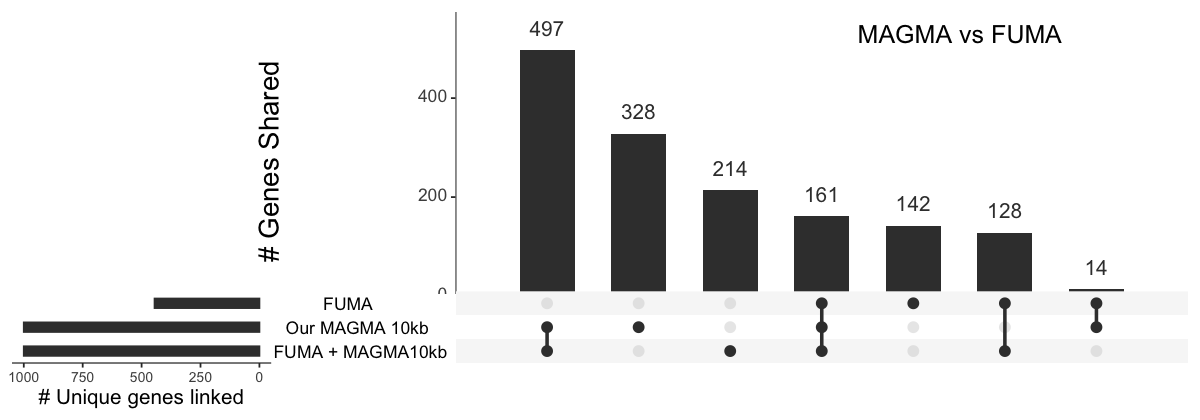

In [84]:
library(UpSetR)
library(grid)
options(repr.plot.height = 3.5, repr.plot.width =10 )
ListInput <- list("Our MAGMA 10kb" = mag_10_genes2$GENE[1:1000], 
                  "FUMA" = fuma_genes$GENE, 
                  "FUMA + MAGMA10kb" = fuma_mag_genes$GENE)
upset(fromList(ListInput), 
      order.by = "freq", keep.order=TRUE, sets.x.label= "# Unique genes linked", 
      point.size=3, line.size=1, 
      mainbar.y.label = "# Genes Shared", text.scale = c(2, 1.5, 1.5, 1.2, 1.5, 2))
grid.text("MAGMA vs FUMA",x = 0.8, y=0.92, gp=gpar(fontsize=15))

In [50]:
## Graph the p values
fuma_genes[1:2,]
fuma_mag_genes[1:2,]

GENE,RA
<chr>,<dbl>
PHTF1,3.75e-168
PTPN22,3.75e-168


GENE,RA
<chr>,<dbl>
TAP2,2.1071e-24
MICB,4.2199e-21


In [55]:
fuma_genes[fuma_genes$GENE %in% intersect(fuma_genes$GENE, fuma_mag_genes$GENE)[1:10],]
fuma_mag_genes[fuma_mag_genes$GENE %in% intersect(fuma_genes$GENE, fuma_mag_genes$GENE)[1:10],]
mag_10_genes2[mag_10_genes2$GENE %in%  intersect(fuma_genes$GENE, fuma_mag_genes$GENE)[1:10],]

GENE,RA
<chr>,<dbl>
PHTF1,3.75e-168
PTPN22,3.75e-168
AP4B1,3.75e-168
DCLRE1B,3.75e-168
MAGI3,8.80e-168
RSBN1,8.80e-168
HSD17B8,2.49e-120
RING1,2.49e-120
KIFC1,2.09e-111


GENE,RA
<chr>,<dbl>
MAGI3,2.2851e-20
PHTF1,7.7716e-16
KIFC1,4.1078e-15
RING1,2.0817e-14
AP4B1,2.3370e-14
RSBN1,4.5852e-14
PHF1,5.6011e-14
HSD17B8,8.2045e-14
PTPN22,3.0247e-12


GENE,RA
<chr>,<dbl>
MAGI3,6.2135e-15
AP4B1,1.4988e-14
DCLRE1B,1.5971e-13
PHTF1,5.0000e-10
RSBN1,5.0000e-10
PTPN22,5.0000e-10
PHF1,8.2990e-01


In [76]:
dim(fuma_genes[fuma_genes$RA < 0.05,])
dim(fuma_genes[fuma_genes$RA < 5e-4,])
dim(fuma_genes[fuma_genes$RA < 5e-8,])
dim(fuma_genes[fuma_genes$RA < 5e-12,])
dim(fuma_genes[fuma_genes$RA < 5e-16,])

[1] 440   2

[1] 436   2

[1] 385   2

[1] 194   2

[1] 132   2

In [77]:
dim(fuma_mag_genes[fuma_mag_genes$RA < 0.05,])
dim(fuma_mag_genes[fuma_mag_genes$RA < 5e-4,])
dim(fuma_mag_genes[fuma_mag_genes$RA < 5e-8,])
dim(fuma_mag_genes[fuma_mag_genes$RA < 5e-12,])
dim(fuma_mag_genes[fuma_mag_genes$RA < 5e-16,])

[1] 1000    2

[1] 659   2

[1] 238   2

[1] 146   2

[1] 30  2

In [78]:
dim(mag_10_genes2[mag_10_genes2$RA < 0.05,])
dim(mag_10_genes2[mag_10_genes2$RA < 5e-4,])
dim(mag_10_genes2[mag_10_genes2$RA < 5e-8,])
dim(mag_10_genes2[mag_10_genes2$RA < 5e-12,])
dim(mag_10_genes2[mag_10_genes2$RA < 5e-16,])

[1] 2429    2

[1] 372   2

[1] 58  2

[1] 11  2

[1] 0 2

In [79]:
test <- mag_10_genes2[1:1000,]
dim(test[test$RA < 0.05,])
dim(test[test$RA < 5e-4,])
dim(test[test$RA < 5e-8,])
dim(test[test$RA < 5e-12,])
dim(test[test$RA < 5e-16,])

[1] 1000    2

[1] 371   2

[1] 58  2

[1] 11  2

[1] 0 2